Best parameters found:  {'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Mean Squared Error: 10154043681.402119


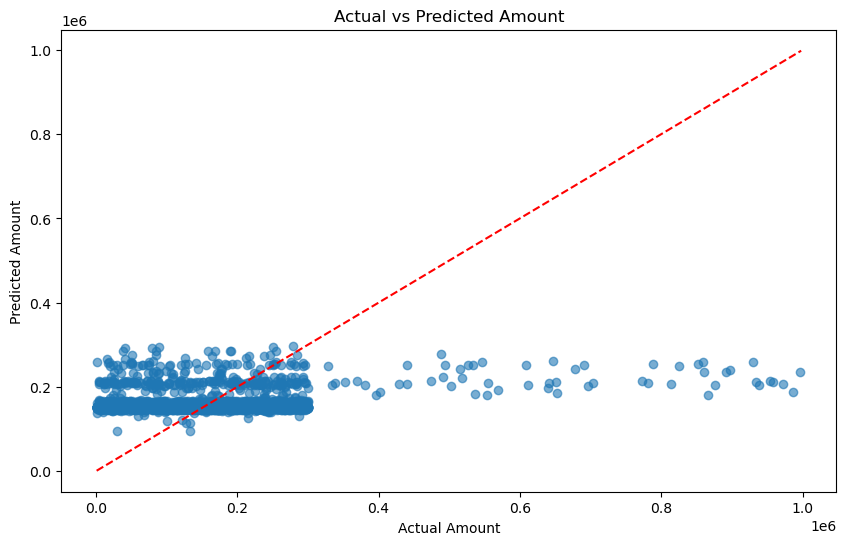

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('dataset.csv').drop('index', axis=1)

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Extract features from Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Drop original Date column
data = data.drop(columns=['Date'])

# Split data into features and target variable
X = data.drop(columns=['Amount'])
y = data['Amount']

# Preprocessing for numerical and categorical data
numeric_features = ['Year', 'Month', 'Day']
categorical_features = ['City', 'Card Type', 'Exp Type', 'Gender']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that includes preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with Grid Search
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Amount')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

Data loaded successfully.
Date column converted to datetime.
Date features extracted.
Original Date column dropped.
Features and target variable separated.
Preprocessor created.
Pipeline created.
Data split into training and testing sets.
Grid search parameters set.
Grid search completed.
Best parameters found:  {'regressor__learning_rate': 0.01, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Model trained with best parameters.
Predictions made on test set.
Mean Squared Error: 10154043681.402119


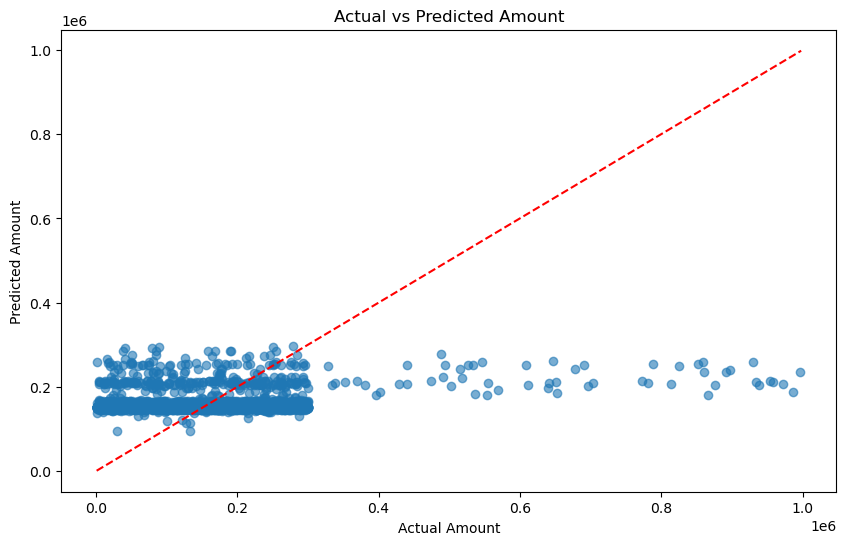

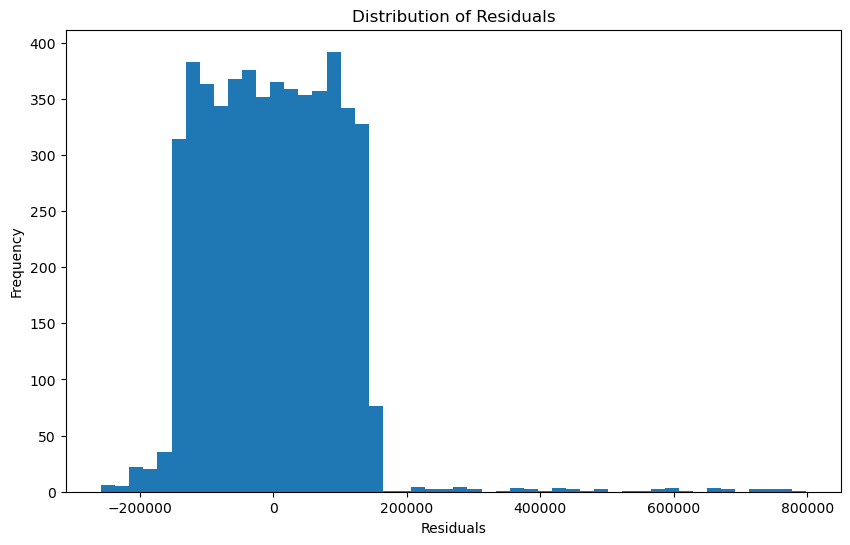

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('dataset.csv').drop('index', axis=1)
print("Data loaded successfully.")

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
print("Date column converted to datetime.")

# Extract features from Date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
print("Date features extracted.")

# Drop original Date column
data = data.drop(columns=['Date'])
print("Original Date column dropped.")

# Split data into features and target variable
X = data.drop(columns=['Amount'])
y = data['Amount']
print("Features and target variable separated.")

# Preprocessing for numerical and categorical data
numeric_features = ['Year', 'Month', 'Day']
categorical_features = ['City', 'Card Type', 'Exp Type', 'Gender']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
print("Preprocessor created.")

# Create a pipeline that includes preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
print("Pipeline created.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

# Hyperparameter tuning with Grid Search
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 400],
    'regressor__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5, 6]
}
print("Grid search parameters set.")

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Grid search completed.")

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
print("Model trained with best parameters.")

# Make predictions on the test set
y_pred = best_model.predict(X_test)
print("Predictions made on test set.")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Amount')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
